In [1]:
#It's for google colab usage on google drive.
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

COLAB_PATH = './drive/My Drive/IT5006'
import sys
sys.path.append(COLAB_PATH)

Mounted at /content/drive


In [23]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

Coding problems in Mini-test at week 2. Point:
*L2 sees same reference point with L1, such that L2 has been also changed once L1 is changed at L1[0] = [5].
*L3 copies L1 and independent from L1, such that L3 is unchanged even when L1 is changed at L1[0] = [5].

In [24]:
L1 = [7, 8, 9, 10]
L2 = L1
L3 = L1.copy()
L4 = L1[:3]
L1[0] = [5]
print(L1, L2, L3, L4)

[[5], 8, 9, 10] [[5], 8, 9, 10] [7, 8, 9, 10] [7, 8, 9]


In [25]:
print(0.5+0.8 == 1)

False


Point below:
*In formula, print(a) is included. So, at f= fx(3), it's printed as 3. However, print(f) duplicate prints, such that we cannot print anything such that we see "None".

In [26]:
def fx(a):
    print(a)
f = fx(3)
print(f)

3
None


# Week 2 - Data and Statistics

## Learning Objectives

+ Different Types of Data File Formats
+ Reading Tabular Data
  + Introduction to Pandas
      + Series and Dataframes
  + Reading CSV file using Pandas
+ Reading Other File Formats in Pandas
+ Network/Graph Data Representation
  + Introduction to Numpy
      + Array
  + Operations on Graph
      + Slicing and Broadcasting
+ Introduction to Scipy
  + Distributions
  + Statistical tests

Most of the materials for this tutorial are from [pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html), "Python for Probability, Statistics, and Machine Learning" by José Unpingco, [scipy lectures](https://scipy-lectures.org/packages/statistics/index.html), and [numpy tutorial](https://numpy.org/devdocs/user/whatisnumpy.html). You can refer to these resources for further understanding and practice. 


For this tutorial, Pandas, Numpy and Scipy need to be installed. You can use the following commands in anaconda prompt to do the installation. 
```
conda install -c anaconda pandas
conda install -c anaconda numpy
conda install -c anaconda scipy
```

# Different Type of Data File Formats

In general, data can be categorized as structured and unstructured data. As Data Scientists, we come across variety of data file formats - depending on the type and modality of the data we are handling. Same data may be available to us in different formats - e.g. while working on clinical data of patients from a hospital, we can have data in any(or all) of the following formats:
+ Various tables (about billing and admission of patient) available with a patient-wise key mappings \[structured data\]
+ Patient-wise ECG data (time-series)
+ Collection of clinical notes (.txt files) for each patient
+ Patient-wise data for Radiology Images (image data)

Different tools and libraries are specialized in handling certain type of data.
Some important file formats that we come across most often in real-life are listed below.
+ Tabular and Structured Data - Excel sheets, csv files, tab separated files, SQL data fall under this category
+ Hierarchical or Nested File Format - JSON and XML are the most popular files under this category. The big-data files of HDF5 may also fall under this category. 
+ Image Data - The image file formats typically depend on the application
+ Text Data - Plain txt files are most common to store unstructured text data (which may have been scrapped from internet)
+ Array Data - Typically graph data, or modelling results are stored in form of array data. This may be available as NPY files or more specific binary file formats. 

In this tutorial, we will see the Python libraries available for handling a few of these data types - Pandas and Numpy. Then, we will explore the usage of another library - Scipy - to perform statistical tests using Python. 

# Reading Tabular Data

Let us first explore the usage of the most popular file format for tabular data - CSV (comma separated values) file. A CSV file is essentially a text file only, but the various columns are separated by comma, and every new line represents a new row. We can read a CSV file like a normal python file, and split on comma, or even use the natively available [csv module](https://docs.python.org/3/library/csv.html) for reading and writing CSV files.

However, for performing analysis, and further integrating with typical ML pipeline, Pandas library is typically used for Data Analytics. 

## Introduction to Pandas

Pandas is a Python package which provides flexibility and expressive data structures designed to work with "relational" or "labeled" data easily. It is well suited for different kinds of data:

+ Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet

+ Ordered and unordered (not necessarily fixed-frequency) time series data.

+ Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels

+ Any other form of observational / statistical data sets. The data need not be labeled at all to be placed into a pandas data structure

There are two primary data structures in Pandas: Series and Dataframes

### Series

Series objects combines an index and corresponding data values. Please note that the community agreed alias for pandas is pd, so loading pandas as pd is assumed standard practice for all the pandas documentation.

In [27]:
import pandas as pd
x = pd.Series(index=range(1,11), data = [x**2 for x in range(1,11)], name="Squares")

In [28]:
x

1       1
2       4
3       9
4      16
5      25
6      36
7      49
8      64
9      81
10    100
Name: Squares, dtype: int64

In [29]:
x.iloc[1:3]

2    4
3    9
Name: Squares, dtype: int64

### Dataframe

This is a two-dimensional, potentially heterogeneous, tabular data structure. It can be thought of as dictionary-like container for Series objects. It is similar to a spreadsheet and can also be loaded from csv files.

<img src = "https://pandas.pydata.org/pandas-docs/stable/_images/01_table_dataframe1.svg">

Every column in a dataframe is a Series. 

In [30]:
cubes = pd.Series(index=range(1,11), data=[x**3 for x in range(1,11)], name="Cubes")

In [31]:
cubes

1        1
2        8
3       27
4       64
5      125
6      216
7      343
8      512
9      729
10    1000
Name: Cubes, dtype: int64

In [32]:
df = pd.DataFrame({"Squares":x, "Cubes":cubes})

In [33]:
df

,Squares,Cubes
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216
7,49,343
8,64,512
9,81,729
10,100,1000


In [34]:
type(df['Squares'])

pandas.core.series.Series

## Reading csv file using Pandas

We can read a csv into a dataframe using pandas. We now read the data contained in the ```brain_size.csv``` file. It gives the observations of brain size and weight and IQ. Reading a CSV in Pandas has many capabilities not available in the basic csv module. You can refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for all the various parameters. 

In [35]:
data_df = pd.read_csv("./drive/My Drive/IT5006/brain_size.csv", sep=';', na_values='.', index_col=0)

In [36]:
data_df

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545
6,Female,99,90,110,146.0,69.0,928799
7,Female,138,136,131,138.0,64.5,991305
8,Female,92,90,98,175.0,66.0,854258
9,Male,89,93,84,134.0,66.3,904858
10,Male,133,114,147,172.0,68.8,955466


We can see tha the datatypes for the dataframe have been inferred. Columns with mixed types are stored with the object dtype. We can also set the dtype to be [categorical](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) or [datetime](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). You can read the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes) for the various data types.

In [37]:
data_df.dtypes

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
dtype: object

In [38]:
data_df.Gender = pd.Categorical(data_df["Gender"])

In [39]:
data_df.dtypes

Gender       category
FSIQ            int64
VIQ             int64
PIQ             int64
Weight        float64
Height        float64
MRI_Count       int64
dtype: object

### Operations on the CSV file using Pandas

We can get some quick properties of the data using Dataframe functions.

In [40]:
data_df.head(10)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545
6,Female,99,90,110,146.0,69.0,928799
7,Female,138,136,131,138.0,64.5,991305
8,Female,92,90,98,175.0,66.0,854258
9,Male,89,93,84,134.0,66.3,904858
10,Male,133,114,147,172.0,68.8,955466


We see that the second row in the dataframe has NaN value in "Weight" column - which indicates a missing value. Note that it is important to handle these missing values when doing statistical analysis.

In [41]:
data_df.shape

(40, 7)

This indicates that the dataframe has 40 rows and 7 columns. We can see the names of the columns if present in the csv too.

In [42]:
data_df.columns

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

Pandas provides us with a quick way to generate descriptive statistics using the ```describe``` function. We will get the descriptive statistics for each of the numeric columns in the data frame.

These statistics are generated by excluding the missing values in the data. The count value in the statistics can also thus be used to get an idea of the number of missing values in the column. 

In [43]:
data_df.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [44]:
data_df.describe(include="all")

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,NaN,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,NaN,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,NaN,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,NaN,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,NaN,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05


We can also check the dataframe for a specific value of specific column directly using format ```df[col]==val```. This returns a series with ```True``` values for only those rows which have the specific ```val``` in the ```col``` mentioned. 

In [45]:
df_female = data_df["Gender"]=="Female"

In [46]:
df_female.head()

1     True
2    False
3    False
4    False
5     True
Name: Gender, dtype: bool

This list can be used to filter the dataframe to get only the rows which adhere to the condition mentioned.

In [47]:
data_df[data_df["Gender"]=="Female"]['VIQ'].mean()

109.45

Alternatively, we can use the series to create a new column ```isFemale``` too.

In [48]:
data_df["isFemale"] = df_female

In [49]:
data_df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,isFemale
1,Female,133,132,124,118.0,64.5,816932,True
2,Male,140,150,124,NaN,72.5,1001121,False
3,Male,139,123,150,143.0,73.3,1038437,False
4,Male,133,129,128,172.0,68.8,965353,False
5,Female,137,132,134,147.0,65.0,951545,True


#### Grouping on values 

You can use ```groupby``` function to split the dataframe on values of the variable.

In [50]:
gender_groupby = data_df.groupby("Gender")

In [51]:
gender_groupby

In [52]:
for gender, val in gender_groupby["VIQ"]:
  print("Gender:" + str(gender))
  print("Values")
  print(val)

Gender:Female
Values
1     132
5     132
6      90
7     136
8      90
11    129
14    120
15    100
16     71
17    132
19    112
23    129
25     86
27     90
29     83
30    126
31    126
35     90
36    129
38     86
Name: VIQ, dtype: int64
Gender:Male
Values
2     150
3     123
4     129
9      93
10    114
12    150
13    129
18     96
20     77
21     83
22    107
24    145
26    145
28     96
32    145
33     96
34     96
37    150
39     90
40     91
Name: VIQ, dtype: int64


So, we see that groupby returns an object that contains information for the group - the groupby VIQ in this case created a series grouped on the value of Gender.

Typically we use groupby to get some aggregate statistics for the groups we have done a groupby on. It is important to note that groupby evaluation is lazy - i.e. no computation is done untill the aggregation function is applied. 

In [53]:
gender_groupby.mean()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,isFemale
Gender,,,,,,,
Female,111.9,109.45,110.45,137.200000,65.765000,862654.6,True
Male,115.0,115.25,111.60,166.444444,71.431579,954855.4,False


## Handling Other File Formats in Pandas

Pandas supports reading many different file formats - including general delimited file (which is referred to as table), Excel, JSON, HDF5, SQL, etc. You can refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) for full details. 

### JSON files
In Python, JSON files can natively also be handled using the [json](https://docs.python.org/3/library/json.html) module. We basically treat the data as Python dictionary. 

Let us quickly explore handling of JSON file in Pandas. For reading a JSON file, the orientation of the file plays an important role, which describes how the JSON file is structured and must be read.  
+ 'split' : dict like {index -> \[index\], columns -> \[columns\], data -> \[values\]}
+ 'records' : list like \[{column -> value}, ... , {column -> value}\]
+ 'index' : dict like {index -> {column -> value}}
+ 'columns' : dict like {column -> {index -> value}}
+ 'values' : just the values array

We can write the `data_df` dataframe as JSON and read it. 

In [54]:
data_df.to_json(orient="split")

'{"columns":["Gender","FSIQ","VIQ","PIQ","Weight","Height","MRI_Count","isFemale"],"index":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],"data":[["Female",133,132,124,118.0,64.5,816932,true],["Male",140,150,124,null,72.5,1001121,false],["Male",139,123,150,143.0,73.3,1038437,false],["Male",133,129,128,172.0,68.8,965353,false],["Female",137,132,134,147.0,65.0,951545,true],["Female",99,90,110,146.0,69.0,928799,true],["Female",138,136,131,138.0,64.5,991305,true],["Female",92,90,98,175.0,66.0,854258,true],["Male",89,93,84,134.0,66.3,904858,false],["Male",133,114,147,172.0,68.8,955466,false],["Female",132,129,124,118.0,64.5,833868,true],["Male",141,150,128,151.0,70.0,1079549,false],["Male",135,129,124,155.0,69.0,924059,false],["Female",140,120,147,155.0,70.5,856472,true],["Female",96,100,90,146.0,66.0,878897,true],["Female",83,71,96,135.0,68.0,865363,true],["Female",132,132,120,127.0,68.5,852244,true],["Male",100,96,102,178.0

In [55]:
data_df.to_json(orient="records")

'[{"Gender":"Female","FSIQ":133,"VIQ":132,"PIQ":124,"Weight":118.0,"Height":64.5,"MRI_Count":816932,"isFemale":true},{"Gender":"Male","FSIQ":140,"VIQ":150,"PIQ":124,"Weight":null,"Height":72.5,"MRI_Count":1001121,"isFemale":false},{"Gender":"Male","FSIQ":139,"VIQ":123,"PIQ":150,"Weight":143.0,"Height":73.3,"MRI_Count":1038437,"isFemale":false},{"Gender":"Male","FSIQ":133,"VIQ":129,"PIQ":128,"Weight":172.0,"Height":68.8,"MRI_Count":965353,"isFemale":false},{"Gender":"Female","FSIQ":137,"VIQ":132,"PIQ":134,"Weight":147.0,"Height":65.0,"MRI_Count":951545,"isFemale":true},{"Gender":"Female","FSIQ":99,"VIQ":90,"PIQ":110,"Weight":146.0,"Height":69.0,"MRI_Count":928799,"isFemale":true},{"Gender":"Female","FSIQ":138,"VIQ":136,"PIQ":131,"Weight":138.0,"Height":64.5,"MRI_Count":991305,"isFemale":true},{"Gender":"Female","FSIQ":92,"VIQ":90,"PIQ":98,"Weight":175.0,"Height":66.0,"MRI_Count":854258,"isFemale":true},{"Gender":"Male","FSIQ":89,"VIQ":93,"PIQ":84,"Weight":134.0,"Height":66.3,"MRI_Count"

### Practise Exercises - Pandas (Optional):
1. How many males/females are included in the study?
2. What is the mean value for VIQ for entire population? Also, print the mean VIQ for each gender in the following format:
```
Male, VIQmeanvalue
Female, VIQmeanvalue
```
3. Create a new column named BMI using the Weight and Height column. The formula is weight(in kgs)/square of height(in m). The height is in inches and weight is in lbs. You can create two new columns with appropriate units before making BMI column. 
4. How does the BMI range vary among males and females, according to underweight(under 18.5), normal(18.5-22.9), and overweight(above 22.9)? 

In [56]:
for gender, val in gender_groupby:
  print("Gender:" + str(gender))
  print("Values")
  print(len(val))

Gender:Female
Values
20
Gender:Male
Values
20


In [57]:
gender_groupby.mean()["VIQ"]["Female"]

109.45

In [58]:
for i in ["Male","Female"]:
  print(str(i)+ ',' + str(gender_groupby.mean()["VIQ"][i]))

Male,115.25
Female,109.45


In [59]:
data_weight_kg = data_df["Weight"] * 0.453592
data_height_m = data_df["Height"] * 0.0254
data_df["WeightKg"] = data_weight_kg
data_df["HeightM"] = data_height_m


In [60]:
data_df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,isFemale,WeightKg,HeightM
1,Female,133,132,124,118.0,64.5,816932,True,53.523856,1.63830
2,Male,140,150,124,NaN,72.5,1001121,False,NaN,1.84150
3,Male,139,123,150,143.0,73.3,1038437,False,64.863656,1.86182
4,Male,133,129,128,172.0,68.8,965353,False,78.017824,1.74752
5,Female,137,132,134,147.0,65.0,951545,True,66.678024,1.65100


In [61]:
data_bmi = data_df["WeightKg"] / (data_df["HeightM"])**2

In [62]:
data_df["BMI"] = data_bmi

In [63]:
data_df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,isFemale,WeightKg,HeightM,BMI
1,Female,133,132,124,118.0,64.5,816932,True,53.523856,1.63830,19.941624
2,Male,140,150,124,NaN,72.5,1001121,False,NaN,1.84150,NaN
3,Male,139,123,150,143.0,73.3,1038437,False,64.863656,1.86182,18.712251
4,Male,133,129,128,172.0,68.8,965353,False,78.017824,1.74752,25.547566
5,Female,137,132,134,147.0,65.0,951545,True,66.678024,1.65100,24.461809


In [64]:
def bmiCategorization(x):
  if x > 22.9:
    return "Overweight"
  elif x >= 18.5:
    return "Normal"
  else:
    return "Underweight"

data_df["BMICategory"] = data_df["BMI"].apply(bmiCategorization)

In [65]:
data_df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,isFemale,WeightKg,HeightM,BMI,BMICategory
1,Female,133,132,124,118.0,64.5,816932,True,53.523856,1.63830,19.941624,Normal
2,Male,140,150,124,NaN,72.5,1001121,False,NaN,1.84150,NaN,Underweight
3,Male,139,123,150,143.0,73.3,1038437,False,64.863656,1.86182,18.712251,Normal
4,Male,133,129,128,172.0,68.8,965353,False,78.017824,1.74752,25.547566,Overweight
5,Female,137,132,134,147.0,65.0,951545,True,66.678024,1.65100,24.461809,Overweight


In [66]:
gender_groupby_BMI = data_df.groupby(["Gender","BMICategory"])

In [67]:
for gender_category, val in gender_groupby_BMI:
  print("Gender,BMICategory:" + str(gender_category))
  print("Values:" + str(len(val)))

Gender,BMICategory:('Female', 'Normal')
Values:13
Gender,BMICategory:('Female', 'Overweight')
Values:7
Gender,BMICategory:('Male', 'Normal')
Values:10
Gender,BMICategory:('Male', 'Overweight')
Values:8
Gender,BMICategory:('Male', 'Underweight')
Values:2


# Handling Network/Graph Data

Suppose we are working on social network data. Let us consider we have the adjacency matrix representation of the social network connectivity available. There are other representations available for graphs, but are beyond scope of the course to cover them.  

Let us take a closer look at adjacency matrix representation. Simply put, the adjacency matrix indicate the connectivity between two nodes - which are indicated by the index of the row and column of the matrix. The presence of an edge between the nodes is indicated by 1 (or the weight in case of weighted graph) or 0 otherwise. 


| ![adj_mat.jpg](https://mathworld.wolfram.com/images/eps-gif/AdjacencyMatrices_1002.gif) | 
|:--:| 
| Image source: Wolfram MathWorld |

Rather than representing this graph data as list of lists using Python, we can use another library - Numpy to represent the adjacency matrix and perform compuattion easily. Incidentally, Pandas is built on top of Numpy, and so all the Pandas operations like sum, aggregation, etc. use the NumPy functionality.

## Introduction to Numpy

Numpy is a fundamental package for scientific computing in Python. At the core of a numpy package is *ndarray* object. This is encapsulation of *n*-dimensional arrays of **homogeneous** data types. There are many important differences between numpy arrays and standard Python sequences:
+ Numpy arrays have fixed size at creation.
+ The items have to be of homogeneous data type.
+ Numpy arrays efficiently execute advanced mathematical operations. 

### Array

We can create a numpy array from a homogeneous list. Numpy's array class is called [```ndarray```](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html). It is also known by the alias ```array```. The ```ndarray``` has attributes like ```ndim```, ```shape```, ```size```, ```dtype```, ```itemsize```, ```data```, etc.

In [68]:
import numpy as np

In [69]:
a = np.array([1,2,5,3])
print(a)

b = np.array(["This", "is", "a", "np", "array", "of", "strings"])
print(b)

[1 2 5 3]
['This' 'is' 'a' 'np' 'array' 'of' 'strings']


We have many options to create new numpy arrays. Let us quickly go through each of the different ways, other than ```np.array```.

In [70]:
b_dash = np.zeros((3,4))
c = np.ones((3,4))
d = np.full((3,4), 0.15)
e = np.empty((3,2))

print(b_dash)
print(c)
print(d)
print(e)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[0.15 0.15 0.15 0.15]
 [0.15 0.15 0.15 0.15]
 [0.15 0.15 0.15 0.15]]
[[0.0e+000 6.4e-323]
 [3.5e-323 4.9e-323]
 [4.0e-323 9.9e-324]]


We can use usual element-wise operations on these arrays.

In [71]:
print(c+d)
print(c*d)

[[1.15 1.15 1.15 1.15]
 [1.15 1.15 1.15 1.15]
 [1.15 1.15 1.15 1.15]]
[[0.15 0.15 0.15 0.15]
 [0.15 0.15 0.15 0.15]
 [0.15 0.15 0.15 0.15]]


```np.arange``` returns evenly spaced values within a given interval - with start, stop and step size which can be specified. Another function which can be used for getting evenly spaced values in specific interval - [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html). Rather than step-size as used in arange, it uses number of samples to generate.

Another function which is handy is ```reshape``` - it can change the shape of the array without changing its data. 

In [72]:
a = np.arange(1,25,3)

In [73]:
a

array([ 1,  4,  7, 10, 13, 16, 19, 22])

In [74]:
a = a.reshape(4,2)
a

array([[ 1,  4],
       [ 7, 10],
       [13, 16],
       [19, 22]])

In [75]:
print(type(a))

<class 'numpy.ndarray'>


In [76]:
np.linspace(2.0, 3.0, num=11)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ])

## Operations on Adjacency Matrix using Numpy

Let us use the adjacency matrix for a 4 node graph shown in the figure earlier.
```
[[0 0 1 1]
[0 0 1 1]
[1 1 0 0]
[1 1 0 0]]
```

In [77]:
c = np.array([[0,0,1,1],[0, 0, 1, 1],[1, 1, 0, 0],[1, 1, 0, 0]])
c

array([[0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 0]])

Now, if we want to find the degree of each node, we need to sum the number of edges for each node. We can use the Numpy operation ```sum``` for finding the degree of each node. 

In [78]:
c.sum(axis=0)

array([2, 2, 2, 2])

In [79]:
c.sum(axis=1)

array([2, 2, 2, 2])

Numpy allows other reductions as well - such as ```argmin```. For these operations, we need to specify the axis for our operation. If the axis is not mentioned, the returned index is into the flattened array.

In numpy, dimensions are called axis. So for a 2x2 array `a`, the first axis has length 4 and second has length 2. For a visual representation, the following image helps capture the direction for operation on the array.

| ![axis.jpg](https://i.stack.imgur.com/h1alT.jpg) | 
|:--:| 
| Image source: Stack Overflow |

We can similarly get statistical results on the data too, again specifying the axes. We can get mean, standard deviation, and many more statistics, using this similar principle. You can look up the documentation to get complete list of functionality. You can explore all such Numpy operations in the [documentation](https://numpy.org/doc/stable/reference/routines.statistics.html).

### Slicing and Broadcasting

Slicing, indexing and iteration in one-dimensional array are much similar to lists in python. Multidimensional arrays can have one index per axis. When fewer indices are provided than the number of axes of the array, the missing indices are considered as complete slices.

In [80]:
print(c[2:4,:])
print(c[2:4])

[[1 1 0 0]
 [1 1 0 0]]
[[1 1 0 0]
 [1 1 0 0]]


We have seen that operations are usually performed element-wise, when both the arrays are of the same shape. Numpy’s broadcasting rule relaxes this constraint when the array shapes meet certain constraints. 

When operating on two arrays, numpy compares their shapes. It starts with the rightmost dimension and works its way left. Two dimensions are compatible when
1. they are equal, or
2. one of them is 1

Note that this implies that the value do not need to same number of dimensions!

#### Application of Broadcasting - Creating distance matrix

Let’s construct an array of distances (in miles) between cities of Route 66 in US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff and Los Angeles. 

```
[0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
```

We can create the adjacency matrix for these cities assuming that the only route for travel is the route mentioned. We will use ```np.newaxis``` for creating column vector from the np array. Then using the broadcasting technique, we can compute the adjacency matrix between the cities. 

In [81]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

In [82]:
mileposts

array([   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448])

In [83]:
mileposts[:,np.newaxis]

array([[   0],
       [ 198],
       [ 303],
       [ 736],
       [ 871],
       [1175],
       [1475],
       [1544],
       [1913],
       [2448]])

In [84]:
mileposts[np.newaxis,:]

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448]])

In [85]:
print(mileposts.shape)
print(mileposts[:, np.newaxis].shape)
print(mileposts[np.newaxis,:].shape)

(10,)
(10, 1)
(1, 10)


In [86]:
distance_array = np.abs(mileposts[np.newaxis, :] - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

Using the adjacency matrix, you can do various computations like shortest path between two nodes, etc. These fall into the category of graph algorithms and are beyond scope of the course, but representing adjacency matrix as numpy array gives the flexibility of performing quick operations.

## Practise Exercises - NumPy (Optional)
1. Use ```np.random.rand``` to create random arrays. Refer to the documentation. Create a 10x2 array.
1. Find the argmax of the array created in previous function, and map it back to the element. Check that the max function returns the same value.
2. Read the documentation for ```np.all``` and ```np.any```. Create two random arrays(a1 and a2). Perform multiplication of both these arrays and check if any of the result satisfies the condition of result<a1+a2. \[Use the appropriate function\]
3. We can create ndarrays from pandas dataframe too using ```.to_numpy()``` function on the dataframe. Convert the data for VIQ and PIQ from brain data used previously into numpy arrays. Check the descriptive statistics using numpy.
5. Write a function which takes a 2d numpy array as input and returns a 2d numpy array with 0 as border on all four sides. e.g.

```
input:
[[1 1]
[1 2]]
```

```
output:
[[0 0 0 0]
[0 1 1 0]
[0 1 2 0]
[0 0 0 0]]
```

In [87]:
random_array = np.random.rand(10,2)

In [88]:
random_array

array([[0.22703607, 0.46148175],
       [0.33916732, 0.46102773],
       [0.94967992, 0.35140292],
       [0.75643593, 0.3199246 ],
       [0.10492002, 0.74687958],
       [0.48965807, 0.06952756],
       [0.75793157, 0.16668225],
       [0.94403963, 0.26633244],
       [0.83370645, 0.83166715],
       [0.2928927 , 0.11219237]])

In [89]:
np.argmax(random_array)

4

In [90]:
random_array.flatten()[8]

0.10492001693360076

In [91]:
max_array = np.full((10,2), random_array.flatten()[np.argmax(random_array)])

In [92]:
max_array

array([[0.94967992, 0.94967992],
       [0.94967992, 0.94967992],
       [0.94967992, 0.94967992],
       [0.94967992, 0.94967992],
       [0.94967992, 0.94967992],
       [0.94967992, 0.94967992],
       [0.94967992, 0.94967992],
       [0.94967992, 0.94967992],
       [0.94967992, 0.94967992],
       [0.94967992, 0.94967992]])

In [93]:
a1 = np.random.rand(4,3)
a2 = np.random.rand(4,3)

In [94]:
a1

array([[0.6615424 , 0.4090191 , 0.28077111],
       [0.01254286, 0.25914753, 0.13234748],
       [0.78413683, 0.9803265 , 0.26655883],
       [0.41129838, 0.48633653, 0.70881541]])

In [95]:
a2

array([[0.5492973 , 0.15896287, 0.19682991],
       [0.68492201, 0.73124929, 0.96304662],
       [0.23604908, 0.04788382, 0.68866246],
       [0.08370815, 0.06380361, 0.75336743]])

In [96]:
a3 = a1 * a2

In [97]:
a3

array([[0.36338345, 0.06501885, 0.05526415],
       [0.00859088, 0.18950145, 0.12745679],
       [0.18509478, 0.04694178, 0.18356906],
       [0.03442903, 0.03103003, 0.53399845]])

In [98]:
np.all(a1)

True

In [99]:
np.all(a2)

True

In [100]:
np.all(a1) and np.all(a2)

True

In [101]:
data_df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,isFemale,WeightKg,HeightM,BMI,BMICategory
1,Female,133,132,124,118.0,64.5,816932,True,53.523856,1.63830,19.941624,Normal
2,Male,140,150,124,NaN,72.5,1001121,False,NaN,1.84150,NaN,Underweight
3,Male,139,123,150,143.0,73.3,1038437,False,64.863656,1.86182,18.712251,Normal
4,Male,133,129,128,172.0,68.8,965353,False,78.017824,1.74752,25.547566,Overweight
5,Female,137,132,134,147.0,65.0,951545,True,66.678024,1.65100,24.461809,Overweight


In [104]:
VIQ_array = data_df["VIQ"].to_numpy()
PIQ_array = data_df["PIQ"].to_numpy()

In [105]:
VIQ_array

array([132, 150, 123, 129, 132,  90, 136,  90,  93, 114, 129, 150, 129,
       120, 100,  71, 132,  96, 112,  77,  83, 107, 129, 145,  86, 145,
        90,  96,  83, 126, 126, 145,  96,  96,  90, 129, 150,  86,  90,
        91])

In [106]:
PIQ_array

array([124, 124, 150, 128, 134, 110, 131,  98,  84, 147, 124, 128, 124,
       147,  90,  96, 120, 102,  84,  86,  86,  84, 134, 128, 102, 131,
        84, 110,  72, 124, 132, 137, 110,  86,  81, 128, 124,  94,  74,
        89])

In [107]:
from scipy import stats
stats.describe(VIQ_array)

DescribeResult(nobs=40, minmax=(71, 150), mean=112.35, variance=557.7205128205128, skewness=0.07095935735493311, kurtosis=-1.35080775473528)

In [108]:
stats.describe(PIQ_array)

DescribeResult(nobs=40, minmax=(72, 150), mean=111.025, variance=504.9480769230769, skewness=-0.09736917025377417, kurtosis=-1.2857921297217902)

In [113]:
c = np.array([[0,0,1,1],[0, 0, 1, 1],[1, 1, 0, 0],[1, 1, 0, 0]])
c

array([[0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 0]])

In [114]:
befpad_array = np.array([[1, 1],[1, 2]])

In [115]:
befpad_array

array([[1, 1],
       [1, 2]])

In [118]:
np.pad(befpad_array, 1)

array([[0, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 0]])

Now that we have seen the various types of data available, let us understand the implementation of statistical inference using Python. We will use the library Scipy for the same. 

# Introduction to Scipy

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc. 

Although there are some basic statistical functions in numpy (e.g., mean, std, median), the real repository for statistical functions is in ```scipy.stats```. There are over eighty continuous probability distributions implemented in ```scipy.stats``` and an additional set of more than ten discrete distributions, along with many other supplementary
statistical functions.

We will go through these distributions and also do basic hypothesis testing using ```scipy.stats```.

## Distributions

Given observations of a random process, their histogram is an estimator of the random process’s PDF (probability density function). We can use ```np.random``` for generating random samples. 

However here, we continue working with the data we have loaded, and fit distribution to the VIQ column of the data. We assume that the data for VIQ is drawn from normal distribution. Let us convert the VIQ column to numpy array first.

In [119]:
samples = data_df.VIQ.to_numpy()
samples

array([132, 150, 123, 129, 132,  90, 136,  90,  93, 114, 129, 150, 129,
       120, 100,  71, 132,  96, 112,  77,  83, 107, 129, 145,  86, 145,
        90,  96,  83, 126, 126, 145,  96,  96,  90, 129, 150,  86,  90,
        91])

We can now fit a normal distribution to this obeserved data. We do a maximum-likelihood fit of the observations to estimate the parameters of the underlying parameters. 

In [121]:
from scipy import stats

loc, std = stats.norm.fit(samples)
print(loc)
print(std)

112.35
23.31903728716089


The mean is an estimator of the center of the distribution. The normal distribution fit by scipy should have same center as the mean of the sample as we have created a sample distribution. 

In [122]:
np.mean(samples)

112.35

The median another estimator of the center. It is the value with half of the observations below, and half above. It is essentially 50 percentile. Unlike the mean, the median is not sensitive to the tails of the distribution. It is “robust”.

In [123]:
np.median(samples)

113.0

In [124]:
stats.scoreatpercentile(samples, 50)

113.0

The percentile is an estimator of the CDF: cumulative distribution function.

## Statistical tests using Scipy

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a T-test to decide whether the means of two sets of observations are significantly different. 

The t-statistic is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. It is used in hypothesis testing via Student's t-test. The t-statistic is used in a t-test to determine if you should support or reject the null hypothesis. It is very similar to the Z-score but with the difference that t-statistic is used when the sample size is small or the population standard deviation is unknown. [Source: Wikipedia]

Let us begin our hypothesis testing using the initial exmaple of brain data. Consider the null hypothesis that the expected value (mean) of the sample of VIQ values is equal to the given population mean. The ```ttest_1samp``` function does two-sided test and returns the T-statistic and p-value.

The 1-sample t-test is used when we want to compare a sample mean to a population mean (which we already know). This is typically handy when we want to see if the mean has changed between the past 2 years and this current sample for a say the shopping cost of customers. A two-tailed test will test both if the mean is significantly greater than x and if the mean significantly less than x. In our example, we take the standard mean 0 as our null hypothesis.

In [125]:
stats.ttest_1samp(samples, 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

Let the significance value be 0.05. As p-value<0.05, we can reject the null hypothesis that population mean for the VIQ measure is 0.

We have already seen that the mean for VIQ is different for males and females. So we can perform a test to check if this difference is significant. We use ttest_ind function for doing a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [129]:
data_df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,isFemale,WeightKg,HeightM,BMI,BMICategory
1,Female,133,132,124,118.0,64.5,816932,True,53.523856,1.63830,19.941624,Normal
2,Male,140,150,124,NaN,72.5,1001121,False,NaN,1.84150,NaN,Underweight
3,Male,139,123,150,143.0,73.3,1038437,False,64.863656,1.86182,18.712251,Normal
4,Male,133,129,128,172.0,68.8,965353,False,78.017824,1.74752,25.547566,Overweight
5,Female,137,132,134,147.0,65.0,951545,True,66.678024,1.65100,24.461809,Overweight


In [126]:
female_viq = data_df[data_df['Gender'] == 'Female']['VIQ']
male_viq = data_df[data_df['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

## Practise Exercises (Optional)
1. Check if the all IQ measures, namely FIQ, PIQ and VIQ, are significantly different from each other, pairwise. 
2. Use the ```stats.gamma.pdf``` to create a random gamma distribution. Compare mean and median on the samples of Gamma distribution. Which seems to be a better estimator?

In [130]:
female_fiq = data_df[data_df['Gender'] == 'Female']['FSIQ']
male_fiq = data_df[data_df['Gender'] == 'Male']['FSIQ']
female_piq = data_df[data_df['Gender'] == 'Female']['PIQ']
male_piq = data_df[data_df['Gender'] == 'Male']['PIQ']

In [127]:
stats.ttest_rel(male_viq, female_viq)

Ttest_relResult(statistic=0.7757651537250586, pvalue=0.44743691639488103)

In [131]:
stats.ttest_rel(male_fiq, female_fiq)

Ttest_relResult(statistic=0.3941372649631935, pvalue=0.6978683757390773)

In [132]:
stats.ttest_rel(male_piq, female_piq)

Ttest_relResult(statistic=0.15856195550687058, pvalue=0.8756872125369227)

In [138]:
import matplotlib.pyplot as plt

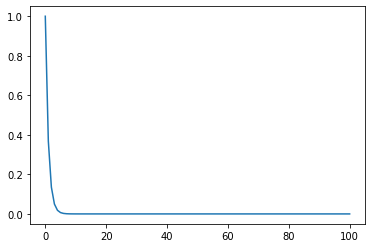

In [152]:
x = np.linspace(0,100,num=101)
a = 1
plt.plot(stats.gamma.pdf(x,a))

In [153]:
np.mean(stats.gamma.pdf(x,a))

0.01566313571157749

In [154]:
np.median(stats.gamma.pdf(x,a))

1.9287498479639178e-22